# Decision Tree Algorithm

sources:
https://www.geeksforgeeks.org/decision-tree/


### Introduction
Decision trees are a popular and powerful tool used in various fields such as machine learning, data mining, and statistics. They provide a clear and intuitive way to make decisions based on data by modeling the relationships between different variables. This article is all about what decision trees are, how they work, their advantages and disadvantages, and their applications.

### What is a Decision Tree?

A decision tree is a flowchart-like structure used to make decisions or predictions. It consists of nodes representing decisions or tests on attributes, branches representing the outcome of these decisions, and leaf nodes representing final outcomes or predictions. Each internal node corresponds to a test on an attribute, each branch corresponds to the result of the test, and each leaf node corresponds to a class label or a continuous value.

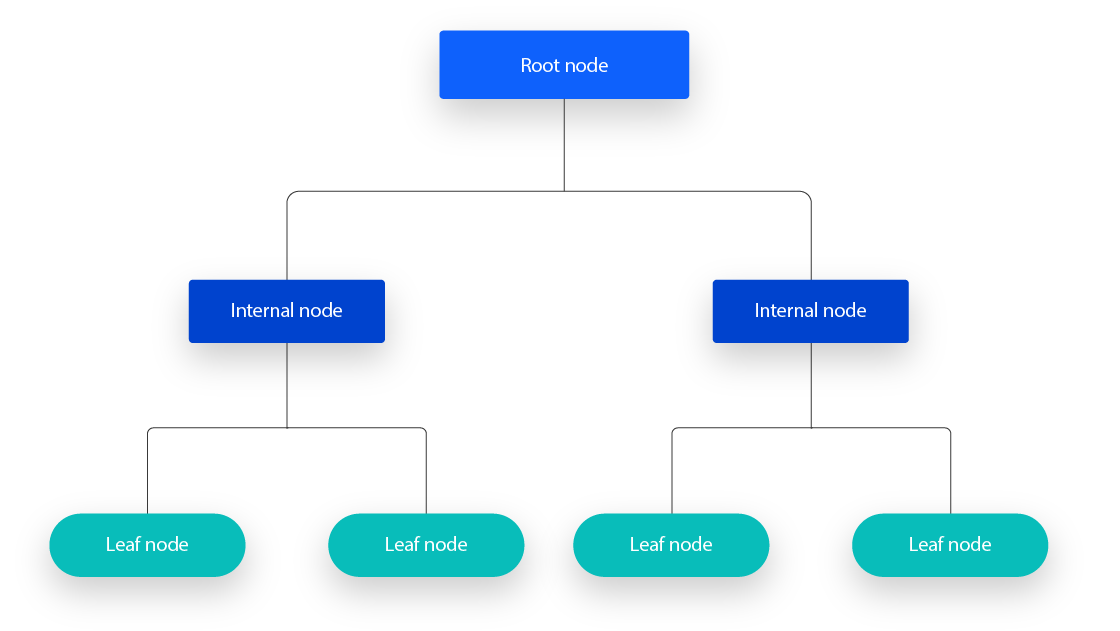

### Structure of a Decision Tree
**Root Node**: Represents the entire dataset and the initial decision to be made. <br>
**Internal Nodes**: Represent decisions or tests on attributes. Each internal node has one or more branches. <br>
**Branches**: Represent the outcome of a decision or test, leading to another node.<br>
**Leaf Nodes**: Represent the final decision or prediction. No further splits occur at these nodes.


### How Decision Trees Work?
The process of creating a decision tree involves:

**Selecting the Best Attribute**: Using a metric like Gini impurity, entropy, or information gain, the best attribute to split the data is selected.<br>
**Splitting the Dataset**: The dataset is split into subsets based on the selected attribute.<br>
**Repeating the Process**: The process is repeated recursively for each subset, creating a new internal node or leaf node until a stopping criterion is met (e.g., all instances in a node belong to the same class or a predefined depth is reached).

In [1]:
# Load libraries
import pandas as pd
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation


In [15]:
PlayTennis = pd.read_csv("datasets/PlayTennis.csv")
PlayTennis

#split dataset in features and target variable
data_features = ['Outlook', 'Temperature', 'Humidity', 'Wind']
X = PlayTennis[data_features]
y = PlayTennis['Play Tennis']

##  Calculating the entropy of the whole dataset

In [16]:
X

,Outlook,Temperature,Humidity,Wind
0,Sunny,Hot,High,Weak
1,Sunny,Hot,High,Strong
2,Overcast,Hot,High,Weak
3,Rain,Mild,High,Weak
4,Rain,Cool,Normal,Weak
5,Rain,Cool,Normal,Strong
6,Overcast,Cool,Normal,Strong
7,Sunny,Mild,High,Weak
8,Sunny,Cool,Normal,Weak
9,Rain,Mild,Normal,Weak


In [10]:
y

0      No
1      No
2     Yes
3     Yes
4     Yes
5      No
6     Yes
7      No
8     Yes
9     Yes
10    Yes
11    Yes
12    Yes
13     No
Name: Play Tennis, dtype: object

In [11]:
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) # 70% training and 30% test

In [12]:
X_train

,Outlook,Temperature,Humidity,Wind
4,Rain,Cool,Normal,Weak
1,Sunny,Hot,High,Strong
12,Overcast,Hot,Normal,Weak
0,Sunny,Hot,High,Weak
13,Rain,Mild,High,Strong
9,Rain,Mild,Normal,Weak
8,Sunny,Cool,Normal,Weak
11,Overcast,Mild,High,Strong
5,Rain,Cool,Normal,Strong


In [13]:
X_test

,Outlook,Temperature,Humidity,Wind
3,Rain,Mild,High,Weak
7,Sunny,Mild,High,Weak
6,Overcast,Cool,Normal,Strong
2,Overcast,Hot,High,Weak
10,Sunny,Mild,Normal,Strong


In [14]:
classificer_object = DecisionTreeClassifier()

# Train Decision Tree Classifer
clf = classificer_object.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)
y_pred


ValueError: could not convert string to float: 'Rain'

### It is easy to implement Decision Tree with numerical values. We can convert all the non numerical values into numerical values using LabelEncoder
https://www.kaggle.com/code/sdk1810/decision-tree-for-playtennis

In [18]:
PlayTennis.columns

Index(['Outlook', 'Temperature', 'Humidity', 'Wind', 'Play Tennis'], dtype='object')

In [19]:
from sklearn.preprocessing import LabelEncoder

Le = LabelEncoder()

PlayTennis['Outlook'] = Le.fit_transform(PlayTennis['Outlook'])
PlayTennis['Temperature'] = Le.fit_transform(PlayTennis['Temperature'])
PlayTennis['Humidity'] = Le.fit_transform(PlayTennis['Humidity'])
PlayTennis['Wind'] = Le.fit_transform(PlayTennis['Wind'])
PlayTennis['Play Tennis'] = Le.fit_transform(PlayTennis['Play Tennis'])
PlayTennis


,Outlook,Temperature,Humidity,Wind,Play Tennis
0,2,1,0,1,0
1,2,1,0,0,0
2,0,1,0,1,1
3,1,2,0,1,1
4,1,0,1,1,1
5,1,0,1,0,0
6,0,0,1,0,1
7,2,2,0,1,0
8,2,0,1,1,1
9,1,2,1,1,1


In [36]:

y = PlayTennis['Play Tennis']
X = PlayTennis.drop(['Play Tennis'],axis=1)

#To divide our data into training and test sets:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1) 

from sklearn.tree import DecisionTreeClassifier     
# import the classifier
classifier =DecisionTreeClassifier(criterion="entropy", random_state=100)     # create a classifier object
classifier.fit(X_train, y_train)  

DecisionTreeClassifier(criterion='entropy', random_state=100)

In [37]:
#Predict the response for test dataset
y_pred= classifier.predict(X_test)  

In [38]:
from sklearn.metrics import accuracy_score
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 1.0
